In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ROOT)
from scipy.stats import norm
import random
import aghast
import pandas as pd
import io
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.lines import Line2D


In [2]:
def BursttoDia(burstID):
    halfTurn = 0.5
    x0 = 1.75
    diaphragm = 0
    if (burstID < 20): diaphragm = x0 + 1*halfTurn;                           # x0 + 0.5 turn                                                                                                                 
    elif (burstID >= 20 and burstID < 30): diaphragm = x0 + 2*halfTurn;     # x0 + 1 turn                                                                                                                   
    elif (burstID >= 30 and burstID < 40): diaphragm = x0 + 3*halfTurn;     # x0 + 1.5 turn                                                                                                                 
    elif (burstID >= 40 and burstID < 50): diaphragm = x0 + 4*halfTurn;     # x0 + 2 turn                                                                                                                   
    elif (burstID >= 50 and burstID < 60): diaphragm = x0 + 5*halfTurn;     # x0 + 2.5 turn                                                                                                                 
    elif (burstID >= 60 and burstID < 70): diaphragm = x0 + 6*halfTurn;     # x0 + 3 turn                                                                                                                   
    elif (burstID >= 70 and burstID < 80): diaphragm = x0 + 7*halfTurn;     # x0 + 3.5 turn                                                                                                                 
    elif (burstID >= 80 and burstID < 90): diaphragm = x0 + 8*halfTurn;     # x0 + 4 turn                                                                                                                   
    elif (burstID >= 90 and burstID < 100): diaphragm = x0 + 9*halfTurn;    # x0 + 4.5 turn                                                                                                                
    elif (burstID >= 100 and burstID < 110): diaphragm = x0 + 5.5*halfTurn; # x0 + 2.75 turn                                                                                                            
    elif (burstID >= 110 and burstID < 120): diaphragm = x0 + 4.5*halfTurn; # x0 + 2.25 turn                                                                                                            
    elif (burstID >= 120 and burstID < 130): diaphragm = x0 + 0.5*halfTurn; # x0 + 0.25 turn                                                                                                            
    elif (burstID >= 130 and burstID <= 140): diaphragm = x0
    elif (burstID > 140 and burstID < 150): diaphragm = x0 - 0.5*halfTurn;  # x0 - 0.25 turn                                                                                                            
    elif (burstID >= 150 and burstID < 160): diaphragm = x0 - 1*halfTurn;   # x0 - 0.50 turn                                                                                                            
    elif (burstID >= 160 and burstID < 170): diaphragm = x0 - 1.5*halfTurn; # x0 - 0.75 turn                                                                                                            
    elif (burstID >= 170 and burstID < 180): diaphragm = x0 - 2*halfTurn;   # x0 - 1 turn                                                                                                               
    elif (burstID >= 180 and burstID < 190): diaphragm = x0 - 2.5*halfTurn; # x0 - 1.25 turn                                                                                                            
    elif (burstID >= 190 and burstID < 200): diaphragm = x0 - 3*halfTurn;   # x0 - 1.50 turn                                                                                                            
    elif (burstID >= 200 and burstID < 210): diaphragm = x0 - 3.5*halfTurn; # x0 - 1.75 turn --> at this point the diaphragm was FULLY closed, which confirms that the NA62 2023 diaphragm setting was 1.75 turn                                                                                                           
    elif (burstID >= 210 and burstID < 220): diaphragm = x0 - 0.5*halfTurn; # x0 - 0.25 turn     
    
    return diaphragm

In [3]:
fold6 = []
fold7 = []
fold8 = []
dia = []

with io.open("DS_output.txt", mode="r", encoding="utf-8") as f:
    #next(f)
    #next(f)
    for line in f:
        l = line.split()
        
        burstid = float(l[-2])
        dia.append(BursttoDia(burstid))
        fold6.append(float(l[11])/float(l[-1]))
        fold7.append(float(l[13])/float(l[-1]))
        fold8.append(float(l[15])/float(l[-1]))

In [4]:
df = pd.DataFrame(list(zip(dia, fold6,fold7,fold8)),
               columns =['Diaphragm', '6Fold', '7Fold', '8Fold'])

In [5]:
df = df.drop(75)
df = df.drop(74)
print(df[df['Diaphragm'].between(5.5, 6.)])

    Diaphragm     6Fold     7Fold     8Fold
76       5.75  0.000515  0.000452  0.000281
77       5.75  0.000522  0.000459  0.000283
78       5.75  0.000511  0.000451  0.000280
79       5.75  0.000526  0.000465  0.000289
80       5.75  0.000519  0.000456  0.000284


In [6]:
df_mean = df.groupby('Diaphragm', as_index=False)['6Fold'].mean()
df_error = df.groupby('Diaphragm', as_index=False)['6Fold'].sem()
df_mean['6Fold_Error'] = df_error['6Fold'].fillna(0)

df_mean['7Fold'] = df.groupby('Diaphragm', as_index=False)['7Fold'].mean()['7Fold']
df_error = df.groupby('Diaphragm', as_index=False)['7Fold'].sem()
df_mean['7Fold_Error'] = df_error['7Fold'].fillna(0)

df_mean['8Fold'] = df.groupby('Diaphragm', as_index=False)['8Fold'].mean()['8Fold']
df_error = df.groupby('Diaphragm', as_index=False)['8Fold'].sem()
df_mean['8Fold_Error'] = df_error['8Fold'].fillna(0)

In [7]:
#
max6 = df.loc[df['6Fold'].idxmax()]['6Fold']
df_mean['6Fold'] *= 1/max6
df_mean['7Fold'] *= 1/max6
df_mean['8Fold'] *= 1/max6

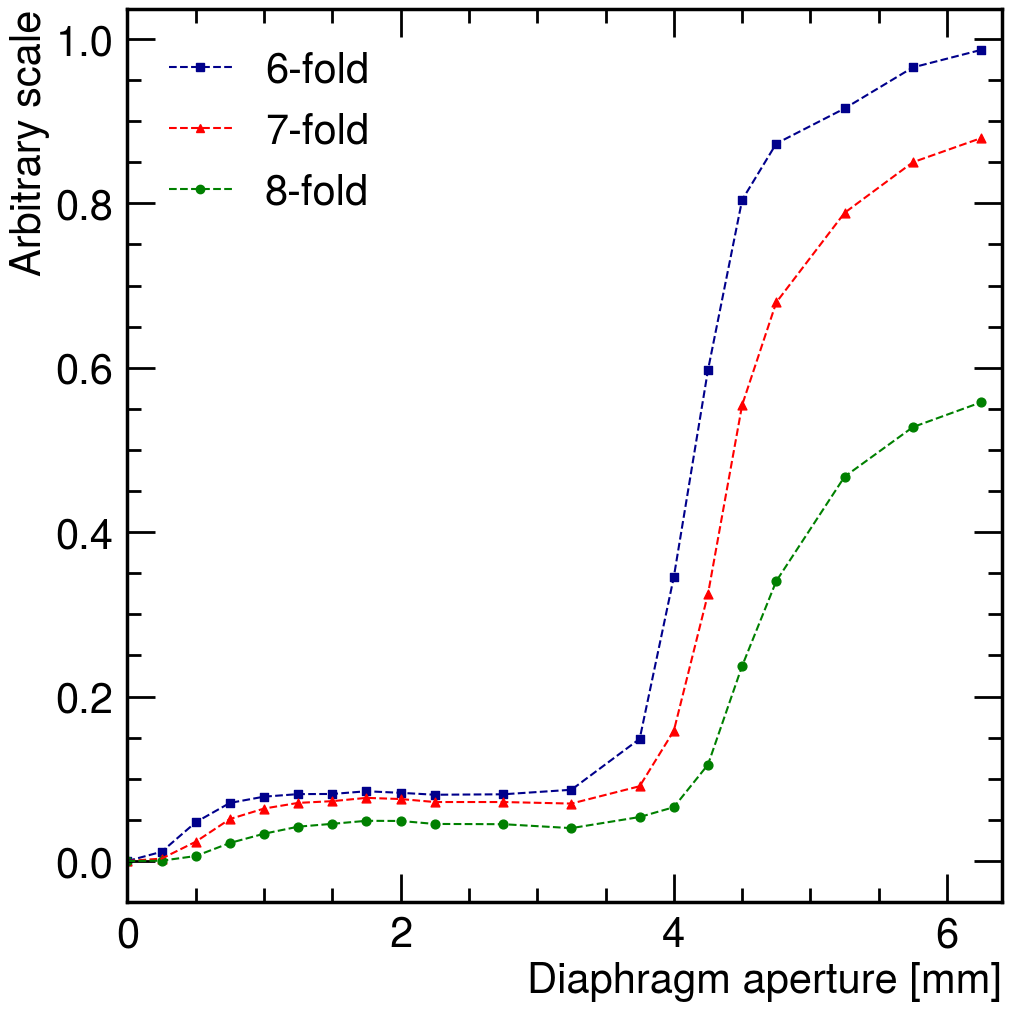

In [9]:
plt.rcParams['figure.constrained_layout.use'] = True
size_marker = 40
ax = df_mean.plot.scatter(x='Diaphragm',y='6Fold', yerr = '6Fold_Error', xerr=0.001, c='DarkBlue',label="6-fold",marker="s",s =size_marker)
ax_1 = df_mean.plot.scatter(x='Diaphragm',y='7Fold', yerr = '7Fold_Error',xerr=0.001,c='red' , label="7-fold", ax=ax, marker="^",s =size_marker)
ax_2 = df_mean.plot.scatter(x='Diaphragm',y='8Fold', yerr = '8Fold_Error', xerr=0.001,c='green', label="8-fold", ax=ax, marker="o",s =size_marker)


df_mean.plot.line(x='Diaphragm',y='6Fold', c='DarkBlue',ax=ax,marker="s",markersize =0, ls="--")
df_mean.plot.line(x='Diaphragm',y='7Fold',c='red', ax=ax, marker="^",markersize =0, ls="--")
df_mean.plot.line(x='Diaphragm',y='8Fold',c='green', ax=ax, marker="o",markersize =0, ls="--")

ax.set_ylabel("Arbitrary scale", fontsize=30)
ax.set_xlabel("Diaphragm aperture [mm]", fontsize=30)
for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2.5)

ax.tick_params(axis='both', which='major', pad=10, labelsize=30)

ax.tick_params(axis="both", which="major", length=20, width=2) 
ax.tick_params(axis="both", which="minor", length=10, width=2)
#ax.legend(prop={'size': 30})

def create_dummy_line(**kwds):
    return Line2D([], [], **kwds)


lines = [
    ('6-fold', {'color': 'DarkBlue','linestyle': '--', 'marker': 's'}),
    ("7-fold", {'color': 'red', 'linestyle': '--', 'marker': '^'}),
    ('8-fold', {'color': 'green', 'linestyle': '--', 'marker': 'o'}),
]
ax.legend(
    # Line handles
    [create_dummy_line(**l[1]) for l in lines],
    # Line titles
    [l[0] for l in lines],
    loc='upper left',
    prop={'size': 30}

)


#ax.set_ylim(0,1)
ax.set_xlim(0,6.4)

plt.savefig("NA62DiaScan.pdf", format="pdf", bbox_inches="tight")